**NOMBRE: Elvis Pachacama**<br>
# Ejercicios Evaluables
1. Tal y como ya hemos visto en clase, la variedad de herramientas proporcionadas por el álgebra lineal son cruciales para desarrollar y fundamentar las bases de una variedad de técnicas relacionadas con el aprendizaje automático. Con ella, podemos describir el proceso de propagación hacia adelante en una red neuronal, identificar mínimos locales en funciones multivariables (crucial para el proceso de retro propagación) o la descripción y empleo de métodos en reducción de la dimensionalidad, como el análisis de componentes principales (PCA), entre michas aplicaciones.<br>
Cuando trabajamos en la práctica dentro de este ámbito, la cantidad de datos que manejamos puede ser muy grande, por lo que es especialmente importante emplear algoritmos eficientes y optimizados para reducir el coste computacional en la medida de lo posible. Por ello, el objetivo de este ejercicio es el de ilustrar las diferentes alternativas que pueden existir para realizar un proceso relacionado con el álgebra lineal y el impacto que puede tener cada variante en términos del coste computacional del mismo. En este caso particular, y a modo de ilustración, nos centraremos en el cálculo del determinante de una matriz.


a) Implementa una función, determinate_recursivo, que obtenga el determinante de una matriz cuadrada utilizando la definición recursiva de Laplace
**Regla de Laplace:** La regla de Laplace es un método que permite calcular rápidamente el determinante de una matriz cuadrada mediante una serie de expansión recursiva.<br>
Pa poder entenderlo de mejor manera, la regla de Laplace factoriza la matriz inicial en matrices de menor dimensión y ajusta su sugnoo en función de la posición del elemento en la matriz.<br>
Este método se puede desarrollar mediante filas o columnas.
## Fórmula de la regla de Laplace
Dada una matriz $Z_{mxn}$ cualquiera de dimensiones $mxn$, donde $m=n$, se expande respecto a la $i-ésima$ fila, entonces:
$$|Z_{mxn}| = z_{i1}* D_{i1} + . . . + z_{in} * D_{in}$$
* $D_{ij}$ es el determinante obtenido de eliminar la $i-esima$ fila y la $i-esima$ columna de $Z_{mxn}$.
  $$D_{ij}= aM_{ij} = (-1)^{i+j}*M_{ij}$$
* $M{ij} es el $i,j-esimo$ *menor*. El determinante $D_{ij} en función de $M_{ij}$ se denomina el $i,j-esimo$ cofactor de la matriz $Z_{mxn}$
* $a$ es el ajuste de signo de la posición.
$$a =(-1)^{+j}$$


In [1]:
!pip install numpy

In [2]:
import numpy as np
#creamos una función donde se va a calcular el determinante de una función la función recive un parámetro que viene Hacer la matriz cuadrada
def determinante_recursivo(M):
    """
    Calculamos el detrminante de una matriz cuadrada usando la definición recursiva de Laplace

    Parametros: M (matriz): La matriz cuadrada nxn

    Valores que retorna mi función 

    Parámetros de tipo float que es el determinante de la matriz
    """
    #creamos una matriz NumPy
    M=np.array(M, dtype=float)
    #CReamos una variable para guardar el tamaño de la matriz
    n=M.shape[0]

    #Creamos una condicional para verificar si el tamaño de la matriz es 1x1
    if n == 1:
        return M[0, 0]
    # Si en el caso que la matriz sea 2 x 2
    if n == 2:
        return M[0,0]*M[1][1] - M[0,1]*M[1,0]
    #Expansión por cofactores en la primera fila
    #creamos una variable donde se va a guardar el determinante y lo inicializamos con 0
    det = 0
    for j in range(n):
        #Se crea una submatriz en la cual se elimina la fila 0 y la columna j
        sub_matriz = np.delete(np.delete(M, 0, axis=0), j, axis= 1)

        #COfactor 
        cofactor = ((-1) ** j) * M[0,j]* determinante_recursivo(sub_matriz)
        det += cofactor
    #retornamos el determinante    
    return det



    
    

In [3]:
##Creamos una función para leer la matriz por teclado 

def leer_matriz():
    n= int(input("Ingrese el tamaño de la matriz (n x n)"))
    print(f"Ingrese los {n}x{n} elementos de la matriz fila por fila separados por espacios:")
    matriz = []
    for i in range(n):
        fila = list(map(float, input(f"Fila {i+1}: ").split()))
        #Si en caso que la longitud de la fila sea distinto de n mandamos un mensaje de error 
        #caso contario añadimos los valores a la matriz
        if len(fila) != n:
            raise ValuError(f"La fila debe tener exactamente {n} elementos")
        matriz.append(fila)
    return np.array(matriz)

### INgresamos la matriz por teclado 
A= leer_matriz()
print("La matriz ingresa es : ")
print(np.array(A))
#Calculamos el determinante 
det = determinante_recursivo(A)
print("El determinate mediante la regla de Laplace es: ")
print(det)
#Verificamos el determinante mediante numpy
print("El determinate mediante NumPy es : ")
print(np.linalg.det(A))

**b)** Si $A$ es una matriz cuadrada $nxn$ y triangular superior o inferior, es decir, con entradas nulas por debajo o por encima de la diagonal, respectivamente, **¿existe alguna forma de calcular de forma directa y sencilla su determinante?** Justifique la respuesta.<br><br>
**Respuesta**<br><br>
Si, existe una forma directa y sencilla de calcular el determinate la explicación es la siguiente, teniendo una matriz cuadrada $A \in \mathbb{R}^{nxn}$ que es triangular, sea superior o inferior, calcular su determinante resulta más sencillo que aplicar la definición recursiva de Laplace o la eliminación gaussiana.<br>
La razón es que, por definición, una matriz triangular solo tiene valores distintos de ceros en la diagonal y en una parte de la matriz ya sea por encima o por debajo de la misma. Esto implica que todos los menores de orden superior que se generan al expandir el determinante contienen filas o columnas con ceros, lo que simplifica enormemente la expresión.<br>
De hecho, existe una propiedad fundamental.
$$det(A)= \prod_{i=1}^na_{ii}$$
Es decir, el determinante de una matriz tringular es simplemente el producto de los elementos de su diagonal principal.<br>
Esto se cumple porque al aplicar la eliminación gaussiana, la matriz ya está en forma escalonada, y no se necesita hacer operaciones adicionales que modifiquen el determinante.<br>

**Ejemplo**
$$A=\begin{bmatrix}
3 & 4 & 5 \\
0 & 3 & 2 \\
0 & 0 & 1
\end{bmatrix}
$$
Como podemos ver en el ejemplo al ser tringula superior, para calcular su determinante se lo hace directamente.<br>
$$det(A) = 3*3*1 = 9$$

**c)** Determínese de forma justificada cómo alteran el determinante de una matriz $nxn$  las dos opereaciones siguientes:<br>
* Intercambiar una fila (o columna) por fila (o columna).
* Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar $a$
<br>

**Respuesta**<br>
  Cuando trabajamos con el determinante de una matriz $A \in \mathbb{R}^{nxn}$, es fundamental comprender cómo se ve afectado por las operaciones elementales de filas o columnas.<br>
  Estos nos permite entender tanto los métodos de cálculo, como la eliminación gaussiana y también las propiedades estructurales del determinante.<br>
**1. Intercambiar una fila o columna por otra.** Si permutamos dos filas o dos columnas de una matriz, el determinante cambia de signo.
  $$\det(A') = -\det(A)$$
donde $A'$ es la matriz obtenida al intercmabiar las dos filas o columnas.<br>
El determinante puede interpretarse como un volumen orientado en $\mathbb{R}^n$. Al intercambiar dos filas, cambiamos la orientación del sistema de vectores que genera ese volumen, lo que implica que el determinante conserva su magnitud pero cambia su signo.<br>
**2. Sumar a un afila o columna otra fila (o columna) multiplicada por un escalar $\alpha$**<br>
Si reemplazamosuna fila $F_i$ por $F_i + \alpha F_j$, con $i \neq j$, el determinante no cambia.
$$det(A')=det(A)$$
El determinante es una función multilineal respecto a las filas o columnas. Esto significa que es lineal en cada fila manteniendo las demás fijas. Al añadir a una fila un múltiplo de otra, no se altera el volumen definido por las filas de la matriz, ya que no se está generando una nueva dirección independiente, sino una combinación de las existentes.


In [5]:
#ejercicio 
#definicmos una matriz de ejemplo
A=np.array([[1,2],[3,4]], dtype=float)
print ("Matriz original A: ")
print(A)

Matriz original A: 
[[1. 2.]
 [3. 4.]]


In [6]:
print("El determinante de la matriz A = ", np.linalg.det(A))

El determinante de la matriz A =  -2.0000000000000004


In [7]:
#Intercambiamos dos filas 
A_inter= A.copy()
#Intercambiamos la fila 1 con la fila 2
A_inter[[0,1]]=A_inter[[1,0]] 

print("\nMAtriz después de intercmabiar F1<->F2:")
print(A_inter)
print("el determinante de la matriz intercambiada es det(A_inter)=", np.linalg.det(A_inter))


MAtriz después de intercmabiar F1<->F2:
[[3. 4.]
 [1. 2.]]
el determinante de la matriz intercambiada es det(A_inter)= 2.0000000000000004


Como se observa al cambiar als filas el signo del determinante cambia

In [8]:
#2 Sumar a una fila un multiplo de otra
A_sum = A.copy()
#
A_sum[1]=A_sum[1]-3*A_sum[0]
#imprimimos el resultado 
print("\nMAtriz después de F2->f2-)*F1")
print(A_sum)
print("det(A_sum)", np.linalg.det(A_sum))



MAtriz después de F2->f2-)*F1
[[ 1.  2.]
 [ 0. -2.]]
det(A_sum) -2.0


**d)** Investiga sobre el método de eliminación de Gauss con pivoteo parcial e implemento para escalonar una matriz ( es decir, convertirla en una matriz triangular inferior) a partir de las operaciones elementales descritas en el apartado anterior.<br>
**Respuesta**
El método de eliminación de Gauss es una técnica fundamental para resolver sistemas de ecuaciones lineales, calcular rangos y preparar matrices para la factorización LU. Su objetivo es transformar una matriz $A$ en una matriz triangular superior mediante operaciones elementales. <br>
Cuando incluimos pivoteo parcial, aumentamos la estabilidad numérica, evitando divisiones por valores muy pequeños que pueden amplificar errores. El pivoteo consiste en buscar en cada columna el elemento de mayor valor absoluto y colocar esa fila en la posición de pivote mediante un intercambio de filas.<br>
COn pivoteo parcial por filas elegimos, en cada columna $k$, el elemento de máximo valor absoluto entre las filas $k,...,n-1$ y permuto filas para colocarlo en la posición $(k,k)$. Esto mejora la estabilidad numperica y evita divisiones por números muy pequeños.
* La versión estándar por filas genera una triangular superior.
* Si lo que queremos es triangular inferior,podemos:
  1. Hacer el mismo algoritmo sobre $A^{T}$, lo que equivale a usar operaciones elementales de columnas en $A$, y luego trasponerde vuelta.
  2. o implementar directamente una versión de eliminación por columnas intercambiando columnas y sumando mmpultiplos de columnas, lo cual es conceptualmente equivalente al punto 1

**Operaciones elementales utilizadas**<br>
**1. Intercambiar una fila por otra**
<br>
$$F_i<->F_J$$
Cambia el signo del determinante, pero en Gauss es necesario para evitar divisiones por ceros o valores muy pequeños.<br>
**2. Sumar a una fila un múltiplo de otra**
$$F_i->F_i-\alpha F_k$$
donde $\alpha = \frac{\alpha_{ik}}{\alpha_{kk}}$ <br>
elimina la entrada $a_{ik}$ de la matriz, escalonando la matriz hacia triangular superior.


In [9]:

def gauss_pivoteo_parcial_superior(A):
    """
    Escalona A a TRIANGULAR SUPERIOR usando eliminación de Gauss con pivoteo parcial por filas.
    Solo usa operaciones elementales de FILAS: intercambio y suma de múltiplos.

    Parámetros:
        A (array-like): matriz n x n

    Retorna:
        U (ndarray): matriz triangular superior equivalente por filas a A
        perm_filas (list[tuple]): lista de permutas de filas realizadas (pares (i,j))
    """
    A = np.array(A, dtype=float, copy=True)
    n = A.shape[0]
    perm_filas = []

    for k in range(n-1):
        # Pivoteo parcial por filas: elegir fila con mayor |A[i,k]|, i>=k
        piv = k + np.argmax(np.abs(A[k:, k]))
        if np.isclose(A[piv, k], 0.0):
            continue  # columna k ya es (casi) nula; seguimos

        if piv != k:
            A[[k, piv]] = A[[piv, k]]
            perm_filas.append((k, piv))

        # Eliminación por debajo del pivote (conserva triangular superior)
        for i in range(k+1, n):
            if not np.isclose(A[k, k], 0.0):
                factor = A[i, k] / A[k, k]
                A[i, k:] -= factor * A[k, k:]

    return A, perm_filas


def gauss_pivoteo_parcial_inferior(A):
    """
    Escalona A a TRIANGULAR INFERIOR aplicando eliminación de Gauss con pivoteo parcial
    sobre A^T (equivale a usar operaciones elementales de COLUMNAS en A).
    
    Estrategia:
      1) Hacemos gauss_pivoteo_parcial_superior(A^T) por filas -> U^T es triangular superior.
      2) Transponemos el resultado para regresar al espacio de A -> obtenemos L triangular inferior.
    
    Parámetros:
        A (array-like): matriz n x n
    
    Retorna:
        L (ndarray): matriz triangular inferior (equivalente por columnas a A)
        perm_columnas (list[tuple]): permutas de columnas realizadas (pares (j1,j2))
                                     (inducidas por las permutas de filas en A^T)
    """
    AT = np.array(A, dtype=float, copy=True).T
    U_t, perm_filas_en_AT = gauss_pivoteo_parcial_superior(AT)
    # Permutas de filas en AT <=> permutas de columnas en A
    perm_columnas = perm_filas_en_AT[:]  # mismas parejas, pero interpretadas como columnas
    L = U_t.T
    return L, perm_columnas




In [10]:
# implementación 
if __name__ == "__main__":
    np.random.seed(7)
    A = np.random.randint(-5, 6, size=(4,4)).astype(float)

    print("A =\n", A)

    # Triangular superior (clásico, por filas)
    U, perm_f = gauss_pivoteo_parcial_superior(A)
    print("\nU (triangular superior) =\n", U)
    print("¿Es triangular superior? ->", np.allclose(np.tril(U, k=-1), 0.0))
    print("Permutas de FILAS (por filas):", perm_f)

    # Triangular inferior (pedido, equivalente por columnas)
    L, perm_c = gauss_pivoteo_parcial_inferior(A)
    print("\nL (triangular inferior) =\n", L)
    print("¿Es triangular inferior? ->", np.allclose(np.triu(L, k=1), 0.0))
    print("Permutas de COLUMNAS (equivalentes):", perm_c)

A =
 [[-1.  4.  1. -2.]
 [-2.  2.  2.  4.]
 [ 2.  3.  4.  5.]
 [ 5.  3.  2.  1.]]

U (triangular superior) =
 [[ 5.00000000e+00  3.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  4.60000000e+00  1.40000000e+00 -1.80000000e+00]
 [ 0.00000000e+00 -2.22044605e-16  2.65217391e+00  5.30434783e+00]
 [ 0.00000000e+00  0.00000000e+00  2.22044605e-16  2.00000000e+00]]
¿Es triangular superior? -> True
Permutas de FILAS (por filas): [(0, np.int64(3)), (1, np.int64(3))]

L (triangular inferior) =
 [[ 4.          0.          0.          0.        ]
 [ 2.          5.          0.          0.        ]
 [ 3.          6.5         4.7         0.        ]
 [ 3.          2.5         6.5        -1.29787234]]
¿Es triangular inferior? -> True
Permutas de COLUMNAS (equivalentes): [(0, np.int64(1)), (1, np.int64(3)), (2, np.int64(3))]


* La complejidad del algoritmo es: $O(n^3)$
* El pivoteo parcial mitiga errores por redondeo al evitar dividir por pivotes muy pequeños.
* El producto de la diagonal de la triangular superior o inferior, ajustado por el signo de las permutas por cada intercambio cambia el signo, te da $det(A)$.
* Se traspone la matriz porque convierte operaciones de filas en operaciones de columnas y viceversa de esa forma obtenemos el escalonamiento inferior son reescribir todo el algoritmo desde cero.



**e)** ¿Cómo se podría calcular el determinante de una matriz haciendo beneficio de la estrategia anterior y del efecto de aplicar las operaciones elementales pertinente?<br>
Implementa una nueva función, determinante_gauss, que calcule el determinante de una matriz utilizando eliminación gaussiana.
<br>
**Respuesta**<br>
Para calcular el determinante de $A \in \mathbb{R}^{nxn}$ aprovechamos los efectos de las operaciones elementales sobre $det():$
1. Intercambiar dos filas: multiplicamos el determinante por -1
$$F_i \leftrightarrow F_j \quad \Rightarrow \quad det(nueva) = -det(anterior)$$
2. Sumar a una fila un múltiplo de otra: no cambia el determinante
$$F_i \leftarrow F_i + \alpha F_j \quad \Rightarrow det(nueva) = det(anterior)$$
La eliminación de Gauss con pivoteo parcial transforma $A$ en una matriz triangular superior $U$ aplicando solo esas dos operaciones. Al final:
$$det(A)= (signo por la permutación) * \prod_{i=1}^nU_{ii}$$
* Cada intercambio de filas, invierte el signo, se multiplica por -1.<br>
* Las restas de múltiplos no alteran el determinante.
* El producto de la diagonal de $U$ es $det(U)$, y por equivalencia de operaciones, $det(A)= \pm det(U)$.<br>
La complejidad es $O(n^3)$ y es mucho más eficiente y estable que la expansión por cofactores $(O(n!))$


In [11]:
def determinante_gauss(A, tol=1e-15):
    """
    Calcula det(A) mediante eliminación gaussiana con pivoteo parcial (por filas),
    usando solo:
      - intercambios de filas (cambian el signo de det),
      - sumas de múltiplos de filas (no cambian det).
    
    Parámetros:
        A : array-like (n x n)
        tol : float, tolerancia para detectar pivote ~ 0 (singularidad numérica)
    
    Retorna:
        detA : float
    """
    A = np.array(A, dtype=float, copy=True)
    n = A.shape[0]
    signo = 1.0  # acumulador del signo debido a permutas

    for k in range(n-1):
        # Pivoteo parcial: fila con mayor |A[i,k]| para i >= k
        piv = k + np.argmax(np.abs(A[k:, k]))
        pivote = A[piv, k]

        # Si el mejor pivote es ~0 -> matriz (casi) singular
        if abs(pivote) < tol:
            return 0.0

        # Si hay que permutar filas
        if piv != k:
            A[[k, piv]] = A[[piv, k]]
            signo *= -1.0

        # Eliminación por debajo del pivote (sin escalar filas)
        for i in range(k+1, n):
            if abs(A[k, k]) < tol:
                return 0.0
            factor = A[i, k] / A[k, k]
            # F_i <- F_i - factor * F_k  (no cambia el determinante)
            A[i, k:] -= factor * A[k, k:]

    # Producto de la diagonal (triangular superior)
    diag_prod = float(np.prod(np.diag(A)))

    # Si el último pivote fue ~0, producto será ~0
    if abs(diag_prod) < tol:
        return 0.0

    return signo * diag_prod

In [12]:
# función para leer la matriz desde el teclado 
def leer_matriz():
    """leemos una matriz cuadrada desde del teclado 
    Retorna un np.ndarray(float).
    """
    n= int(input("Ingrese el tamaño de la matriz (nxn): "))
    print(f"Ingrese los {n}x{n} elementos de la matriz, fila por fila, separados por espacios:")
    #Creamos una matiz vacia
    matriz=[]
    #Iteramos para ingresar datos a la matriz
    for i in range(n):
        fila = list(map(float, input(f"Fila {i+1}: ").split()))
        #Verifica que las fila sean igual al número de elementos ingresados
        if len(fila)!=n:
            raise ValueError(f"La fila debe tener exactamente {n} elementos")
        matriz.append(fila)
    return np.array(matriz, dtype=float)

In [13]:
# Programa principal 
A = leer_matriz()
#Imprimimos la matriz ingresada
print("\nMatriz ingresada")
print(A)

det_gauss= determinante_gauss(A)
det_numpy = np.linalg.det(A)

print(f"\nDeterminante (Gauss con pivoteo parcial): {det_gauss:.6f}")
print(f"\nDeterminante (NumPy): {det_numpy:.6f}")
#Calculamos el error relativo entre las dos respuestas 
print(f"Error relativo:{abs(det_gauss-det_numpy)/max(1.0, abs(det_numpy)):.2e}")

Ingrese el tamaño de la matriz (nxn):  3


Ingrese los 3x3 elementos de la matriz, fila por fila, separados por espacios:


Fila 1:  1 2 3
Fila 2:   1 2 3
Fila 3:  1 2 3



Matriz ingresada
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]

Determinante (Gauss con pivoteo parcial): 0.000000

Determinante (NumPy): 0.000000
Error relativo:0.00e+00


**f)** Obtén la complejidad computacional asociada al cálculo del determinante con la definición ecursiva y con el método de eliminación de Gauss con pivoteo parcial.<br>
**Respuesta**<br>
**1. Definición recursiva (expansión de Laplace)**<br>
Sabiendo que para el cálculo del $det(A)$ se obtine expandiendo por una fila/columna
$$det(A) = \sum_{j=1}^n(-1)^{i+j}a_{ij}det(M_{ij})$$<br>
donde cada $M_{ij}$ es un menor de tamaño $(n-1)x(n-1)$.<br>
**Recurrencia de coste:** <br>
Para una matriz $ n x n$, se calculan $n$ determinantes de tamaño $n-1$:
$$T(n) =nT(n-1)+C(n),$$<br>
donde $C(n)$ es el coste  de formar menores y sumar (polimonial, típicamente $O(n^2))$. El término dominante es la parte recursiva.<br>
*Resolución (orden):**<br>
Desplegando la recurrencia:<br>
$$T(n)=n(n-1)T(n-2) \approx n!T(1) \Rightarrow T(n) = \Theta(n!)$$.
**Conclusión:**<br>
1. Complejidad super-exponencial: $\Theta(n!)$
2. Útil solo para $n$ pequeños, es impracticable para $n$ moderados o grandes.<br>
**2. Eliminación de Gauss con pivote parcial**<br>
Mediante operaciones elementales de filas, sumas de múltiplos, intercambios con pivoteo parcial, entonces llevamos $A$ a triangular superior $U$, luego<br>
$$det(A) = (signo por permutas) \prod_{i=1}^nU_{ii}$$
**Coste por capas**<br>
* Eliminación columna a columna: para la columna $k$ se anula $(n-k-1)$ entradas, y cada anulación actualiza $\sim(n-k)$ elementos de la fila.
* Sumando sobre $k=0,...,n-2$, el número total de operaciones aritméticas es:
$$\sum_{k=0}^{n-2}(n-k-1)(n-k) = \frac{2}{3}n^3+O(n^2)$$
* Pivoteo parcial añade comparaciones $O(n^2)$, que no cambian el orden.
**Conclusión(flops):**
* Para este punto la complejidad cúbica: $\Theta(n^3)$
* Más precisamente: $\approx \frac{2}{3}n^3+O(n^2)$ operaciones en coma flotante.
* Estable y práctica en cómputo científico.





**g)** Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la forma $A_n \in \mathbb{R}^{nxn}$, para $2\leq n \leq 10$, y confecciona una tabla comparativa del tiempo de ejecución asociado a cada una de las variantes siguientes, interpretando los resultados:
* Utilizando determinante_recursivo.
* Emplenado determinant_gauss.
* Haciendo el uso de la función preprogramada numpy.linalg.det

In [33]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
#determinante por definición recursiva Laplace
# Complejidad ~ O(n!) -> solo útil pedagógicamente para n pequeño
def determinante_recursivo(A):
    A=np.array(A, dtype=float)
    n= A.shape[0]
    #casos base
    if n==1:
        return A[0, 0]
    if n == 2:
        return A[0, 0] * A[1, 1] - A[0, 1]*A[1,0]
    #Expansión por cofactores en la primera fila
    det = 0.0
    for j in range(n):
        sub= np.delete(np.delete(A, 0, axis=0), j, axis=1)
        det += ((-1)**j)* A[0, j] * determinante_recursivo(sub)
    return det

In [34]:
#Determinante por eliminación de Gauss con pivoteo parcial
# -Intercambio de filas: cambia el signo del determinante
# - Restar multiplos de filas: No cambia el determinante
# Complejidad ~ O(n^3)
#-----------------------------------------------------------------------------------------------
def determinante_gauss(A, tol=1e-15):
    A=np.array(A, dtype=float, copy=True)
    n= A.shape[0]
    #Acumula el (-1) por permutas de filas
    signo = 1.0
    for k in range(n-1):
        #Pivoteo parcial: mejor fila (máximo |A[i,k]|, i>=k)
        piv=k +np.argmax(np.abs(A[k:, k]))
        if abs(A[piv,k]) <tol:
            #matriz singular numéricamente
            return 0.0
        #Permutar si es necesario
        if piv != k:
            A[[k, piv]] = A[[piv, k]]
            signo *= -1.0
        #Eliminación hacia abajo (F_i <- F_i -factor *F_k)
        for i in range(k+1,n):
            #seguridad numérica
            if abs(A[k, k]) < tol:
                return 0.0
            factor = A[i, k]/A[k,k]
            A[i,k:] -= factor * A[k, k:]
        #Producto de la diagonal (triangular superior)
        diag_prod = float(np.prod(np.diag(A)))
        #Creamos una condicional para verificar si el producto de la diagonal < tol retornamos 0
        if abs(diag_prod) < tol:
            return 0.0
        return signo * diag_prod
            
            
            

In [35]:
#Implementamos la utilidad del código
#Medimos el tiempo promedio de una función sobre A
def medir_tiempo(func, A, repeticiones=1):
    t_acum = 0.0
    val=None
    for _ in range(repeticiones):
        t0=time.perf_counter()
        val = func(A)
        t1 = time.perf_counter()
        t_acum += (t1-t0)
    return t_acum/repeticiones, val


=== Comparativa de tiempos y exactitud (2 ≤ n ≤ 10) ===
 n  tiempo_recursivo_s  tiempo_gauss_s  tiempo_numpy_s  det_recursivo     det_gauss  det_numpy  err_rel_rec_vs_np  err_rel_gauss_vs_np
 2            0.000042        0.000362        0.000021      -0.767646 -7.676463e-01  -0.767646       1.110223e-16         1.110223e-16
 3            0.000132        0.000102        0.000019      -0.173988 -1.728317e-01  -0.173988       0.000000e+00         1.156755e-03
 4            0.000432        0.000105        0.000014      -0.000714 -1.865601e-02  -0.000714       7.589415e-19         1.794152e-02
 5            0.001957        0.000127        0.000021      -0.023473  3.924371e-03  -0.023473       1.734723e-17         2.739720e-02
 6            0.013336        0.000235        0.000042       0.036619  8.279027e-04   0.036619       6.938894e-18         3.579094e-02
 7            0.094255        0.000192        0.000040       0.282640 -7.846579e-04   0.282640       5.551115e-17         2.834250e-0

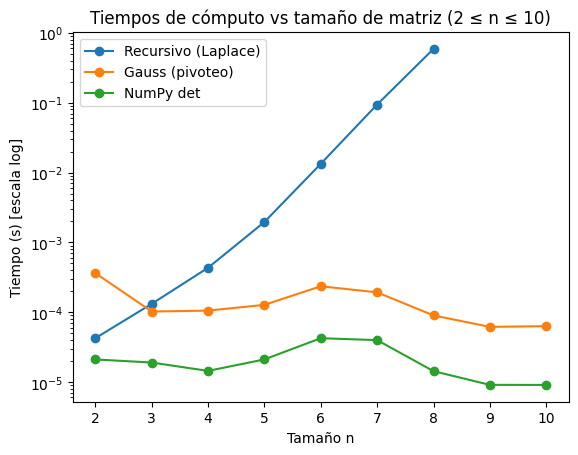

In [36]:
ns = list(range(2, 11))   # 2..10
MAX_N_RECURSIVO = 8       # límite práctico para Laplace

resultados = []
np.random.seed(2025)      # reproducibilidad

for n in ns:
    A = np.random.rand(n, n)  # A_n ∈ R^{n×n} con U(0,1)

    # (a) Determinante recursivo (si n ≤ 8)
    if n <= MAX_N_RECURSIVO:
        t_rec, det_rec = medir_tiempo(determinante_recursivo, A, repeticiones=1)
    else:
        t_rec, det_rec = (np.nan, np.nan)  # no se calcula por coste
    # (b) Determinante por Gauss (promediamos para suavizar variabilidad)
    t_gauss, det_gauss = medir_tiempo(determinante_gauss, A, repeticiones=3)
    # (c) Determinante NumPy (referencia LAPACK)
    t_np, det_np = medir_tiempo(np.linalg.det, A, repeticiones=5)

    # Error relativo vs NumPy (para verificar consistencia)
    def err_rel(x, y):
        return float(abs(x - y) / max(1.0, abs(y))) if np.isfinite(x) and np.isfinite(y) else np.nan

    resultados.append({
        "n": n,
        "tiempo_recursivo_s": t_rec,
        "tiempo_gauss_s": t_gauss,
        "tiempo_numpy_s": t_np,
        "det_recursivo": det_rec,
        "det_gauss": det_gauss,
        "det_numpy": det_np,
        "err_rel_rec_vs_np": err_rel(det_rec, det_np),
        "err_rel_gauss_vs_np": err_rel(det_gauss, det_np),
    })

# Tabla comparativa
df = pd.DataFrame(resultados)
print("\n=== Comparativa de tiempos y exactitud (2 ≤ n ≤ 10) ===")
print(df.to_string(index=False))

# ------------------------------------------------------------
# 5) Gráfica de tiempos (escala log) para visualizar diferencias
#    Reglas: 1 gráfica, sin estilos ni colores específicos
# ------------------------------------------------------------
plt.figure()
plt.plot(df["n"], df["tiempo_recursivo_s"], marker="o", label="Recursivo (Laplace)")
plt.plot(df["n"], df["tiempo_gauss_s"], marker="o", label="Gauss (pivoteo)")
plt.plot(df["n"], df["tiempo_numpy_s"], marker="o", label="NumPy det")
plt.yscale("log")
plt.xlabel("Tamaño n")
plt.ylabel("Tiempo (s) [escala log]")
plt.title("Tiempos de cómputo vs tamaño de matriz (2 ≤ n ≤ 10)")
plt.legend()
plt.show()

In [38]:
# Prueba
A=[[2, -1, 3],
   [1, 0, 2],
   [4, 1, 8]]
t, det_rec=medir_tiempo(determinante_recursivo, A)
print("determinante (recursivo): ", det_rec)
print("determinante (NumPy):     ", np.linalg.det(np.array(A)))

determinante (recursivo):  -1.0
determinante (NumPy):      -1.0000000000000004


## Conclusión 
A partir del desarrollo del ejercicio, quedó claramente evidenciado el contraste entre la complejidad factorial del método recursivo de Laplace y la complejida cúbica de la eliminación de Gauss con pivoteo parcial. Mientras que la definición recursiva resulta útil para amtrices de tamaño reducido, el crecimiento explosivo del tiempo de ejecución la convierte en una alternativa impracticable para problemas reales.<br>
Por el contario, la estrategia de Gauss con pivoteo parcial no solo garantiza un costo computacional mucho más manejable, sino que además incorpora mayor estabilidad numérica gracias al uso del pivoteo. Finalmente, la comparación con la función optimizada de Numpy **numpy.linalg.det** permitió constatar la validez de las implementaciones y resaltar cómo las librerías científicas actuales se apoyan en algoritmos eficientes basados en factorizaciones matriciales.<br>
En el contexto de la Inteligencia Artificial y el Aprendizaje Automático, esta reflexión es fundamental, la elección del mpetodo no es meramente teórica, sino que determina la viabilidad del cálculo en escenarios donde se manipulan grandes volúmenes de datos. Por ello, resulta imprescindible optar por algoritmos con complejidad polinómica y evitar aquellos que, aunque correctos en lo conceptual, no escalan de forma adecuada.

# Ejercicio 2
En este ejercicio trabajaremos con el método de descenso de gradiente, el cual constituye otra herramienta crucial, en esta ocasión de la rama del calculo, para el proceso de retropropagación asociado al entrenamiento de una red neuronal.<br>

**Desarrollo**
### Introducción al descenso de gradiente
El método de descenso de gradiente es un algoritmo iterativo de optimización ampliamente utilizado en aprendizaje automático y especialmente en el entrenamiento de redes neuronales. Su fundamento está en el cálculo diferencial, busca minimizar una función de coste $J(\Theta)$ actualizando los parámetros en la dirección opuesta del gradiente.

**Regla de actualización general**
$$\Theta^{k+1}=\Theta^{(k)} - \eta \nabla J(\Theta^{(k)})$$
**Donde:**
* $\theta$: vector de parámetros
* $\eta > 0$: tasa de aprendizaje
* $\nabla J(\theta^{(k)})$: gradiente de la función de consto en la iteración k.
El proceso se repite hasta cumplir un criterio de parada (número máximo de iteraciones o cuando la magnitud del gradiente es suficientemente pequeña).<br>
**Variantes del descenso de gradiente**<br>
* Batch Gradient Descent (BGD: utiliza todos los datos en cada iteración
* Stochastic Gradient Descent (SGD): usa un solo dato aleatorio en cada iteración
* Mini-batch Gradient Descent: usa subconjuntos de datos, combinando las ventajas de BGD y SGD<br>
**a)** Prográmase en Python el método de descenso de gradiente para funciones de $n$ variables. La función deberá tener como parámetros de entradas:
 * EL gradiente de la función que se desea minimizar $\nabla f$ (puede venir dada como otra función previamente implementada, grad_f,con entrada un vector, representando el gradiente de $f$ en dicho punto)
 * Un valor inicial $x_0 \in \mathbb{R}^{n}$ (almacenando en un vector d $n$ componentes).
 * El ratio de aprendizaje $\gamma$ (que se asume constante para cada iteración).
 * Un parámeto de tolerancia $tol$ ( con el que finaliza el proceso cuando $||\nabla f(x)||_2 < tol$).
 * Un número máximo de iteraciones maxit ( con el fin de evitar ejecuciones indefinidas en caso de divergencia o convergencia muy lenta).
La salida de la función deberá ser la aproximación del $x$ que cumple $f'(x) \approx 0$ ,correspondiente a la última iteración realizada en el método.

                                                                                                                                                                                                                                                  

In [1]:
import numpy as np

def descenso_gradiente_con_historia(grad_f, x0, gamma, tol=1e-6, maxit=10_000, 
                                    track_f=None):
    """
    Descenso de gradiente (GD) con historial y metadatos.

    Parámetros
    ----------
    grad_f : callable
        Gradiente de f. Debe cumplir: grad_f(x: np.ndarray) -> np.ndarray con misma forma que x.
    x0 : np.ndarray (shape (n,))
        Punto inicial en R^n.
    gamma : float
        Ratio de aprendizaje (constante por iteración).
    tol : float, opcional
        Tolerancia para ||∇f(x_k)||_2: se detiene si es menor que tol.
    maxit : int, opcional
        Número máximo de iteraciones.
    track_f : callable, opcional
        Si se proporciona, debe cumplir track_f(x) -> float (para registrar f(x) en el historial).

    Retorna
    -------
    x : np.ndarray
        Aproximación del punto donde ∇f(x) ≈ 0 (última iteración).
    info : dict
        Metadatos del proceso:
            - "nit": iteraciones realizadas
            - "grad_norm": ||∇f(x)||_2 final
            - "stopping": "grad_tol" o "maxit"
            - "history": dict con listas
                * "x": lista de copias de x_k (np.ndarray)
                * "grad_norm": lista con ||∇f(x_k)||_2
                * "f" (opcional): lista con f(x_k) si track_f está definido
    """
    # --- Validaciones básicas ---
    x = np.asarray(x0, dtype=float).copy()
    if x.ndim != 1:
        raise ValueError("x0 debe ser un vector 1D (shape (n,)).")
    if not np.isscalar(gamma) or gamma <= 0:
        raise ValueError("gamma debe ser un escalar positivo.")
    if tol <= 0:
        raise ValueError("tol debe ser positivo.")
    if int(maxit) < 1:
        raise ValueError("maxit debe ser un entero positivo.")

    # --- Historial ---
    hist = {"x": [], "grad_norm": []}
    if track_f is not None:
        hist["f"] = []

    stopping = "maxit"
    nit = 0

    # --- Iteraciones de GD ---
    for k in range(int(maxit)):
        g = np.asarray(grad_f(x), dtype=float)
        if g.shape != x.shape:
            raise ValueError("grad_f(x) debe devolver un vector con la misma forma que x0.")
        g_norm = np.linalg.norm(g, ord=2)

        # Registro antes de actualizar (x_k, ||g_k||, f(x_k) si aplica)
        hist["x"].append(x.copy())
        hist["grad_norm"].append(g_norm)
        if track_f is not None:
            hist["f"].append(float(track_f(x)))

        # Criterio de parada por tolerancia de gradiente
        if g_norm < tol:
            stopping = "grad_tol"
            nit = k + 1
            break

        # Actualización: x_{k+1} = x_k - gamma * g_k
        x = x - gamma * g
        nit = k + 1

    info = {
        "nit": nit,
        "grad_norm": float(np.linalg.norm(grad_f(x), ord=2)),
        "stopping": stopping,
        "history": hist
    }
    return x, info


x* aproximado: [ 0.72727272 -2.36363635]
||∇f(x*)||_2: 9.178042883834252e-09
Iteraciones: 59
Criterio de parada: grad_tol


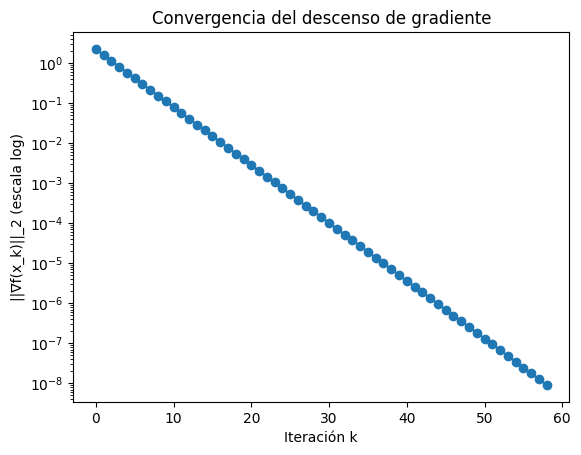

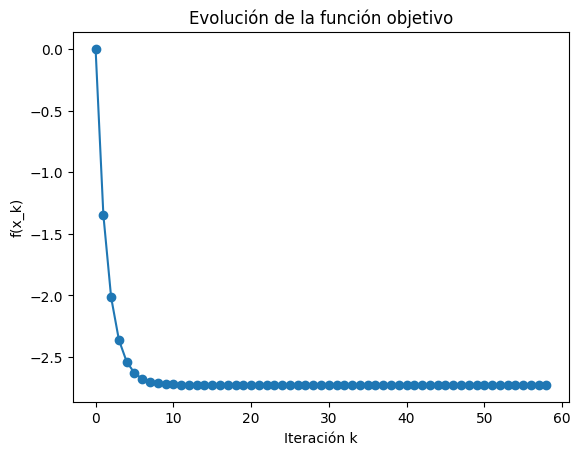

In [2]:
import matplotlib.pyplot as plt

# f(x) = 1/2 x^T Q x + b^T x  -> ∇f(x) = Qx + b
Q = np.array([[3.0, 0.5],
              [0.5, 1.0]])
b = np.array([-1.0, 2.0])

def grad_f(x):
    return Q @ x + b

def f(x):
    return 0.5 * x @ (Q @ x) + b @ x

# Inicialización y gamma estable (para cuadrática: 0 < gamma < 2/L)
L = np.max(np.linalg.eigvals(Q)).real
gamma = 1.0 / L
x0 = np.array([0.0, 0.0])

x_star, info = descenso_gradiente_con_historia(grad_f, x0, gamma=gamma, tol=1e-8, maxit=10_000,
                                               track_f=f)

print("x* aproximado:", x_star)
print("||∇f(x*)||_2:", info["grad_norm"])
print("Iteraciones:", info["nit"])
print("Criterio de parada:", info["stopping"])

# Gráfico de norma del gradiente (escala log para claridad)
plt.figure()
plt.plot(info["history"]["grad_norm"], marker="o")
plt.yscale("log")
plt.xlabel("Iteración k")
plt.ylabel("||∇f(x_k)||_2 (escala log)")
plt.title("Convergencia del descenso de gradiente")
plt.show()

# (Opcional) Gráfico de f(x_k) si lo registraste
if "f" in info["history"]:
    plt.figure()
    plt.plot(info["history"]["f"], marker="o")
    plt.xlabel("Iteración k")
    plt.ylabel("f(x_k)")
    plt.title("Evolución de la función objetivo")
    plt.show()


**Conclusión**

El desarrollo de este ejercicio permitió comprender de manera práctica el funcionamiento del método de descenso de gradiente como herramienta fundamental en optimización y aprendizaje automático. A través de la implementación en Python, se verificó que el algoritmo, partiendo de un valor inicial $𝑥_0 ∈𝑅^n$ y siguiendo la dirección contraria al gradiente, es capaz de aproximarse de manera progresiva a un punto donde ∇𝑓(𝑥)≈0, lo que corresponde a un mínimo local de la función objetivo.<br>

Un aspecto clave observado es la influencia directa del ratio de aprendizaje (𝛾) en la convergencia: valores demasiado grandes provocan oscilaciones o divergencia, mientras que valores demasiado pequeños generan una convergencia excesivamente lenta. Asimismo, la incorporación de criterios de parada, tanto mediante la norma del gradiente como con un número máximo de iteraciones, asegura la estabilidad y evita ejecuciones indefinidas.<br>

En conclusión, este ejercicio refuerza la importancia del descenso de gradiente no solo como una técnica computacional eficiente, sino también como la base matemática sobre la que se construyen algoritmos más avanzados en inteligencia artificial, tales como la retropropagación en redes neuronales. La práctica realizada permite valorar cómo un concepto aparentemente sencillo en cálculo diferencial se transforma en una herramienta indispensable para el entrenamiento de modelos en la era del aprendizaje automático.

**b)** Sea la función $f : \mathbb{R} → \mathbb{R}$ dada por
$$f(x) = 3x^4 + 4x^3 − 12x^2 + 7.$$
i. Aplica el método sobre $f(x)$ con $x_0 = 3 γ = 0.001, tol=1e-12$, $maxit=1e5$.
ii. Aplica de nuevo el método sobre $f(x)$ con $x_0 = 3, γ = 0.01$, $tol=1e-12, maxit=1e5$.
iii. Contrasta e interpreta los dos resultados obtenidos en los apartados anteriores y compáralos con los mínimos locales obtenidos analíticamente. 
¿Qué influencia puede llegar a tener la elecci´on del ratio de aprendizaje γ?
iv. Aplica nuevamente el método sobre $f(x)$ con $x0 = 3, γ = 0.1$, $tol=1e-12, maxit=1e5$. Interpreta el resultado.
v. Finalmente, aplica el método sobre $f(x)$ con $x0 = 0, γ = 0.001,tol=1e-12, maxit=1e5$. Interpreta el resultado y compáralo con el estudio analítico
de f. ¿Se trata de un resultado deseable? ¿Por qué? ¿A qué se debe este fenómeno?

In [3]:
# ============================================================
# Ejercicio 2: Descenso de gradiente en 1D
# f(x) = 3x^4 + 4x^3 − 12x^2 + 7
# Casos: (i) (ii) (iv) (v) y contraste (iii)
# ============================================================


# --- Definición de f, f' y f'' ---
def f(x: float) -> float:
    return 3*x**4 + 4*x**3 - 12*x**2 + 7

def df(x: float) -> float:
    # f'(x) = 12x^3 + 12x^2 - 24x = 12x(x+2)(x-1)
    return 12*x**3 + 12*x**2 - 24*x

def d2f(x: float) -> float:
    # f''(x) = 36x^2 + 24x - 24
    return 36*x**2 + 24*x - 24

# --- Descenso de gradiente 1D con gamma constante ---
def gd_1d(df, x0, gamma, tol=1e-12, maxit=100_000, track=False):
    """
    Descenso de gradiente en R -> R con ratio de aprendizaje constante (gamma).
    Criterio de parada: |f'(x_k)| < tol (gradiente cerca de cero).
    """
    x = float(x0)
    hist = {"x": [], "f": [], "g": []} if track else None

    for k in range(int(maxit)):
        g = float(df(x))
        if track:
            hist["x"].append(x)
            hist["f"].append(f(x))
            hist["g"].append(abs(g))

        if abs(g) < tol:
            return x, k+1, True, hist

        # Paso de GD
        x = x - gamma * g

        # Corte de seguridad ante posible divergencia numérica
        if abs(x) > 1e12:
            return x, k+1, False, hist

    return x, int(maxit), False, hist

# --- Estudio analítico (para el apartado iii y v) ---
critical_points = [-2.0, 0.0, 1.0]
print("=== Estudio analítico de puntos críticos ===")
for xc in critical_points:
    tipo = "mínimo local" if d2f(xc) > 0 else ("máximo local" if d2f(xc) < 0 else "inflexión")
    print(f"x* = {xc:>4}, f(x*) = {f(xc):>8.3f}, f''(x*) = {d2f(xc):>8.3f}  -> {tipo}")
print()

# --- Casos solicitados ---
casos = [
    ("(i)  x0=3, gamma=0.001, tol=1e-12, maxit=1e5", 3.0, 0.001, 1e-12, 100_000),
    ("(ii) x0=3, gamma=0.01,  tol=1e-12, maxit=1e5", 3.0, 0.01,  1e-12, 100_000),
    ("(iv) x0=3, gamma=0.1,   tol=1e-12, maxit=1e5", 3.0, 0.1,   1e-12, 100_000),
    ("(v)  x0=0, gamma=0.001, tol=1e-12, maxit=1e5", 0.0, 0.001, 1e-12, 100_000),
]

print("=== Resultados de descenso de gradiente ===")
resumen = []
for nombre, x0, gamma, tol, maxit in casos:
    x_star, nit, convergio, hist = gd_1d(df, x0, gamma, tol, maxit, track=False)
    resumen.append((nombre, x0, gamma, x_star, f(x_star), abs(df(x_star)), d2f(x_star), nit, convergio))
    estado = "OK" if convergio else "NO"
    print(f"{nombre}\n"
          f"  -> x_final = {x_star:.10f}, f(x_final) = {f(x_star):.10f}, "
          f"|f'(x_final)| = {abs(df(x_star)):.2e}, f''(x_final) = {d2f(x_star):.4f}\n"
          f"  -> iters = {nit}, convergió: {estado}\n")

# --- Comentarios guía para interpretar (iii), (iv) y (v) ---
print("=== Comentarios para interpretar ===")
print("(iii) Comparación (i) vs (ii):")
print("- Ambos parten de x0=3. Con gamma=0.001 (i) los pasos son pequeños y suele converger\n"
      "  de forma estable al mínimo local cercano (x≈1). Con gamma=0.01 (ii) los pasos son mayores;\n"
      "  desde x=3 con f'(3)>0, el método se mueve a la izquierda. Puede quedarse en la cuenca de x≈1\n"
      "  o, si el paso cruza suficientemente, caer hacia x≈-2 (mínimo global). La elección de gamma\n"
      "  influye en rapidez y en el riesgo de saltar entre cuencas o de oscilar.")
print("\n(iv) Con gamma=0.1 (x0=3):")
print("- El paso es demasiado grande. Lo usual es observar oscilaciones o divergencia; el gradiente no\n"
      "  decae por debajo de la tolerancia. Esto ilustra que un gamma alto impide la convergencia.")
print("\n(v) Con x0=0 y gamma=0.001:")
print("- Aquí f'(0)=0, por lo que el método se detiene de inmediato en x=0, que analíticamente es un\n"
      "  MÁXIMO local (no deseable si queremos minimizar). Esto ocurre porque el criterio de parada se\n"
      "  basa en gradiente nulo, que no distingue mínimo/máximo/silla; la curvatura (f'') es la que\n"
      "  diferencia. Es un ejemplo del carácter local del método y de la importancia de elegir x0.")


=== Estudio analítico de puntos críticos ===
x* = -2.0, f(x*) =  -25.000, f''(x*) =   72.000  -> mínimo local
x* =  0.0, f(x*) =    7.000, f''(x*) =  -24.000  -> máximo local
x* =  1.0, f(x*) =    2.000, f''(x*) =   36.000  -> mínimo local

=== Resultados de descenso de gradiente ===
(i)  x0=3, gamma=0.001, tol=1e-12, maxit=1e5
  -> x_final = 1.0000000000, f(x_final) = 2.0000000000, |f'(x_final)| = 9.91e-13, f''(x_final) = 36.0000
  -> iters = 832, convergió: OK

(ii) x0=3, gamma=0.01,  tol=1e-12, maxit=1e5
  -> x_final = -2.0000000000, f(x_final) = -25.0000000000, |f'(x_final)| = 8.38e-13, f''(x_final) = 72.0000
  -> iters = 32, convergió: OK

(iv) x0=3, gamma=0.1,   tol=1e-12, maxit=1e5
  -> x_final = -87049951065956.7812500000, f(x_final) = 172264338190201166885826233182410160230745303146987257856.0000000000, |f'(x_final)| = 7.92e+42, f''(x_final) = 272796983301074863973904416768.0000
  -> iters = 3, convergió: NO

(v)  x0=0, gamma=0.001, tol=1e-12, maxit=1e5
  -> x_final = 0.000000

**c)** Sea la función $g :  \mathbb{R}^2 →  \mathbb{R}$ dada por
$$g(x,y)=x^2+y^3+3xy+1$$
i. Aplíquese el método sobre $g(x, y)$ con $x0 = (−1, 1), γ = 0.01, tol=1e-12, maxit=1e5$.<br>
ii.¿Qué ocurre si ahora partimos de $x_0 = (0, 0)$? ¿Se obtiene un resultado deseable?<br>
iii. Realícese el estudio analítico de la función y utilícese para explicar y contrastar los resultados obtenidos en los dos apartados anteriores.

In [4]:
# ============================================================
# Ejercicio (último punto):
# g(x, y) = x^2 + y^3 + 3xy + 1
# (i)  x0 = (-1, 1), gamma=0.01, tol=1e-12, maxit=1e5
# (ii) x0 = (0, 0),  gamma=0.01, tol=1e-12, maxit=1e5  (¿resultado deseable?)
# (iii) Estudio analítico y contraste
# ============================================================

import numpy as np

# ---------- Definición de g, ∇g y ∇²g ----------
def g(xy):
    x, y = xy
    return x**2 + y**3 + 3*x*y + 1

def grad_g(xy):
    x, y = xy
    # ∂g/∂x = 2x + 3y ; ∂g/∂y = 3y^2 + 3x
    return np.array([2*x + 3*y, 3*y**2 + 3*x], dtype=float)

def hess_g(xy):
    x, y = xy
    # Hessiana: [[2, 3],[3, 6y]]
    return np.array([[2.0, 3.0],
                     [3.0, 6.0*y]], dtype=float)

# ---------- Descenso de gradiente 2D (gamma constante) ----------
def gd_2d(grad_f, x0, gamma, tol=1e-12, maxit=100_000, track=False):
    x = np.asarray(x0, dtype=float).copy()
    hist = {"x": [], "g_norm": [], "f": []} if track else None
    for k in range(int(maxit)):
        gk = grad_f(x)
        gnorm = float(np.linalg.norm(gk))
        if track:
            hist["x"].append(x.copy())
            hist["g_norm"].append(gnorm)
            hist["f"].append(g(x))
        if gnorm < tol:
            return x, k+1, True, hist
        x = x - gamma * gk
        # corte de seguridad por divergencia numérica
        if np.any(np.abs(x) > 1e12):
            return x, k+1, False, hist
    return x, int(maxit), False, hist

# ---------- (i) y (ii): ejecuciones solicitadas ----------
params = dict(gamma=0.01, tol=1e-12, maxit=100_000)

x0_i  = np.array([-1.0,  1.0])
x_i, nit_i, conv_i, _ = gd_2d(grad_g, x0_i, **params)

x0_ii = np.array([ 0.0,  0.0])
x_ii, nit_ii, conv_ii, _ = gd_2d(grad_g, x0_ii, **params)

print("=== Resultados numéricos ===")
print("(i)  x0 = (-1, 1), gamma = 0.01")
print(f" -> x_final = {x_i},  g(x_final) = {g(x_i):.10f},  ||∇g|| = {np.linalg.norm(grad_g(x_i)):.2e},  iters = {nit_i}, convergió = {conv_i}")
print("(ii) x0 = (0, 0),  gamma = 0.01")
print(f" -> x_final = {x_ii}, g(x_final) = {g(x_ii):.10f}, ||∇g|| = {np.linalg.norm(grad_g(x_ii)):.2e}, iters = {nit_ii}, convergió = {conv_ii}")

# ---------- (iii) Estudio analítico ----------
# Puntos críticos resolviendo ∇g=0:
# 2x + 3y = 0  -> x = -(3/2) y
# 3y^2 + 3x = 0 -> x = -y^2
# Igualando: -(3/2)y = -y^2  => y( y - 3/2 ) = 0  -> y = 0 o y = 3/2
criticos = [
    np.array([0.0, 0.0]),           # (x,y) = (0,0)
    np.array([-9.0/4.0, 3.0/2.0])   # (x,y) = (-9/4, 3/2)
]

def clasifica(xy):
    H = hess_g(xy)
    detH = np.linalg.det(H)
    if detH > 0 and H[0,0] > 0:
        return "mínimo local"
    elif detH > 0 and H[0,0] < 0:
        return "máximo local"
    elif detH < 0:
        return "punto de silla"
    else:
        return "indeterminado"

print("\n=== Estudio analítico (∇g=0) ===")
for p in criticos:
    print(f"x* = {p},  g(x*) = {g(p):.6f},  Hess det = {np.linalg.det(hess_g(p)):.3f},  tipo: {clasifica(p)}")


=== Resultados numéricos ===
(i)  x0 = (-1, 1), gamma = 0.01
 -> x_final = [-2.25  1.5 ],  g(x_final) = -0.6875000000,  ||∇g|| = 9.99e-13,  iters = 3140, convergió = True
(ii) x0 = (0, 0),  gamma = 0.01
 -> x_final = [0. 0.], g(x_final) = 1.0000000000, ||∇g|| = 0.00e+00, iters = 1, convergió = True

=== Estudio analítico (∇g=0) ===
x* = [0. 0.],  g(x*) = 1.000000,  Hess det = -9.000,  tipo: punto de silla
x* = [-2.25  1.5 ],  g(x*) = -0.687500,  Hess det = 9.000,  tipo: mínimo local
